# Mask R-CNN - Inspect Training Data

<i> Sébastien Ohleyer </i>

Inspect and visualize data loading and pre-processing code. 

Python 3

In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

%matplotlib inline 

ROOT_DIR = os.getcwd()

/Users/sebastienohleyer/anaconda3/envs/objreco_namr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
ROOT_DIR

'/Users/sebastienohleyer/Documents/ENS MVA/Object recognition/mask_rcnn'

## Configurations

In [3]:
import aerial
config = aerial.AerialConfig()
AERIAL_DIR = "../AerialImageDataset/"  # TODO: enter value here
TOWN_LIST = ["austin", "chicago", "kitsap", "tyrol-w", "vienna"]

## Dataset

In [4]:
# Load dataset
dataset = aerial.AerialDataset()
dataset.load_aerial(AERIAL_DIR, "train")
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Info: {}".format(dataset.class_info))

Image Count: 180
Class Info: [{'source': '', 'id': 0, 'name': 'BG'}, {'source': 'aerial', 'id': 1, 'name': 'building'}]


In [5]:
#dataset.image_ids

In [6]:
#Load a test image
#image_id = np.random.choice(dataset.image_ids)
image_id=155
image_name = dataset.image_info[image_id]['image_name']
image = dataset.load_image(image_id)
(instance_labels, instance_idx), class_ids, full_mask = dataset.load_mask(image_id, mode="uppest")

<function matplotlib.pyplot.show>

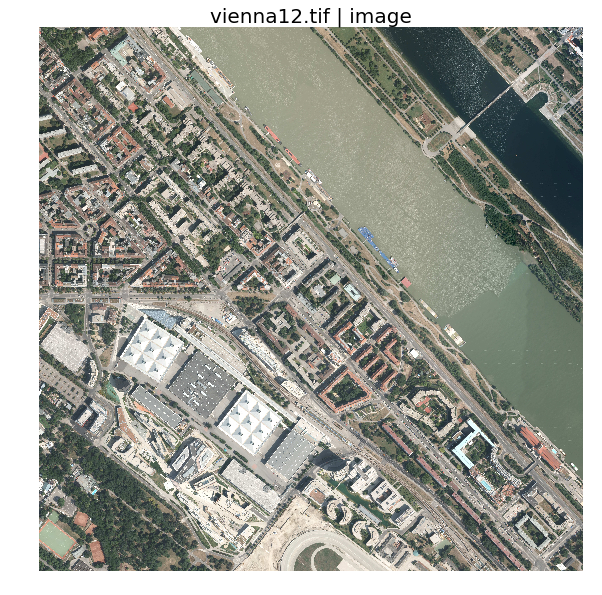

In [7]:
import imageio

plt.figure(figsize=(10,10))
plt.imshow( image )
plt.axis('off')
plt.title(image_name + ' | image', fontsize=20)
plt.show

<function matplotlib.pyplot.show>

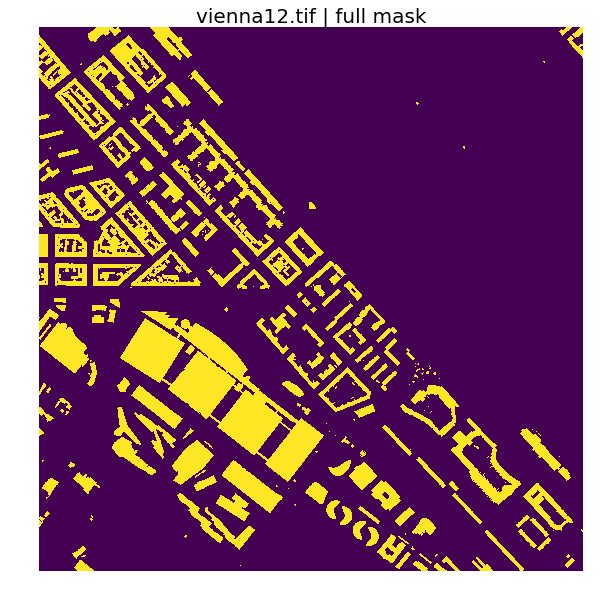

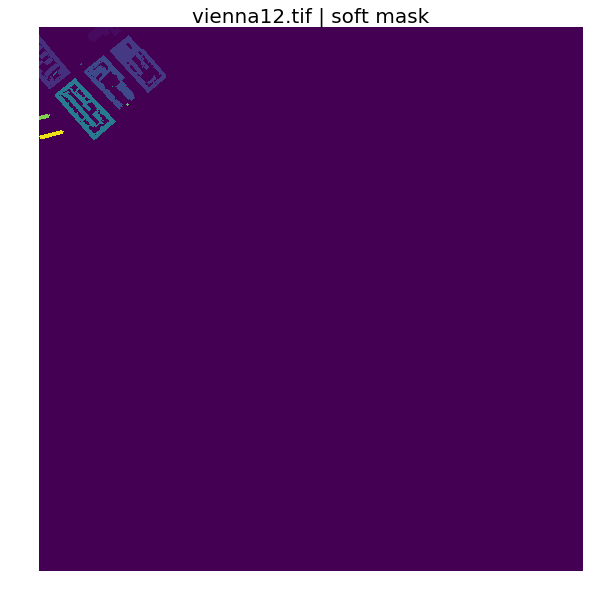

In [8]:
plt.figure(figsize=(10,10))
plt.imshow( full_mask )
plt.axis('off')
plt.title(image_name + ' | full mask', fontsize=20)
plt.show

plt.figure(figsize=(10,10))
plt.imshow( instance_labels)
plt.axis('off')
plt.title(image_name + ' | soft mask', fontsize=20)
plt.show

## Bounding Boxes

In [9]:
# Compute Bounding box
num_instances = len(instance_idx)
print(num_instances)
bbox = utils.extract_bboxes(instance_labels, instance_idx)

20


image_id  155 vienna12.tif
image                    shape: (5000, 5000, 3)       min:    0.00000  max:  255.00000
mask                     shape: (5000, 5000)          min:    0.00000  max:  255.00000
class_ids                shape: (2,)                  min:    0.00000  max:    1.00000
bbox                     shape: (20, 4)               min:    0.00000  max: 1173.00000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


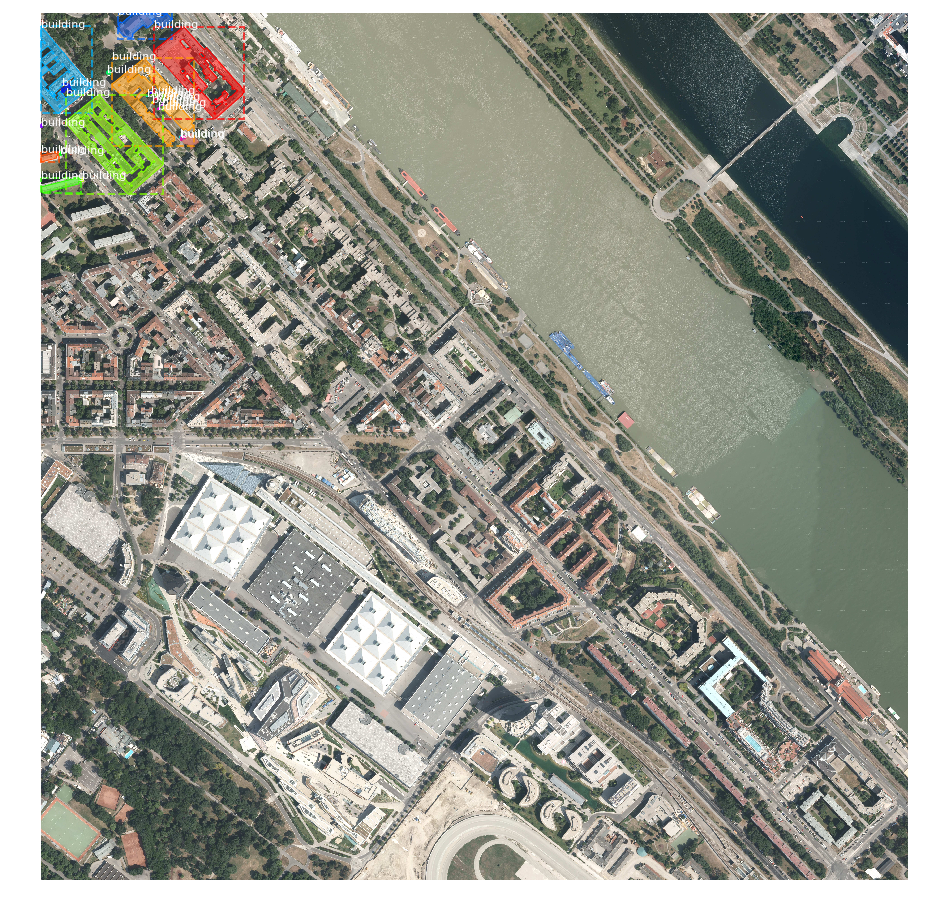

In [10]:
# Display image and additional stats
print("image_id ", image_id, dataset.image_info[image_id]['image_name'])
log("image", image)
log("mask", full_mask)
log("class_ids", dataset.class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox,  instance_labels, instance_idx, class_ids, dataset.class_names)

## Resize Images

image_id:  155 
Original shape:  (5000, 5000, 3)
image                    shape: (1024, 1024, 3)       min:   25.00000  max:  255.00000
mask                     shape: (1024, 1024)          min:    0.00000  max:   36.00000
class_ids                shape: (20,)                 min:    1.00000  max:    1.00000
bbox                     shape: (20, 4)               min:    0.00000  max: 1024.00000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


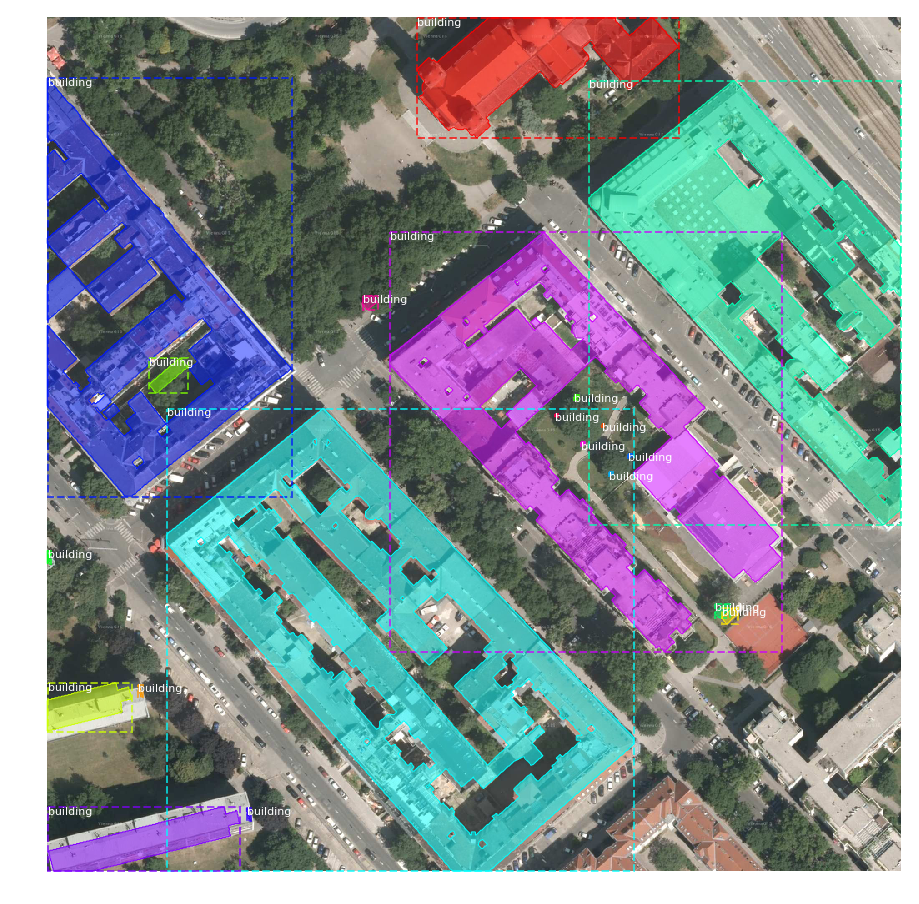

In [11]:
# Load random image and mask.
original_shape = image.shape
# Resize
image_resized, window, scale, padding = utils.resize_image(image)
instance_label_resized = utils.resize_mask(instance_labels, scale, padding)
# Compute Bounding box
bbox_resized = utils.extract_bboxes(instance_label_resized, instance_idx)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image_resized)
log("mask", instance_label_resized)
log("class_ids", class_ids)
log("bbox", bbox_resized)
# Display image and instances
visualize.display_instances(image_resized, bbox_resized, instance_label_resized, instance_idx, class_ids, dataset.class_names)

## Mini Masks

image                    shape: (1024, 1024, 3)       min:   25.00000  max:  255.00000
image_meta               shape: (10,)                 min:    0.00000  max: 5000.00000
class_ids                shape: (20,)                 min:    1.00000  max:    1.00000
bbox                     shape: (20, 4)               min:    0.00000  max: 1024.00000
mask                     shape: (1024, 1024)          min:    0.00000  max:   36.00000


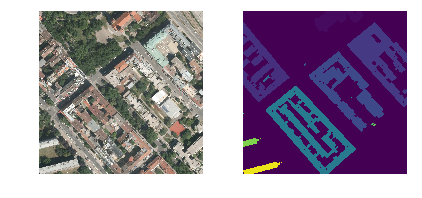

In [12]:
image, image_meta, class_ids, bbox, (instance_label, instance_idx) = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", instance_label)

display_images([image]+[instance_label])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


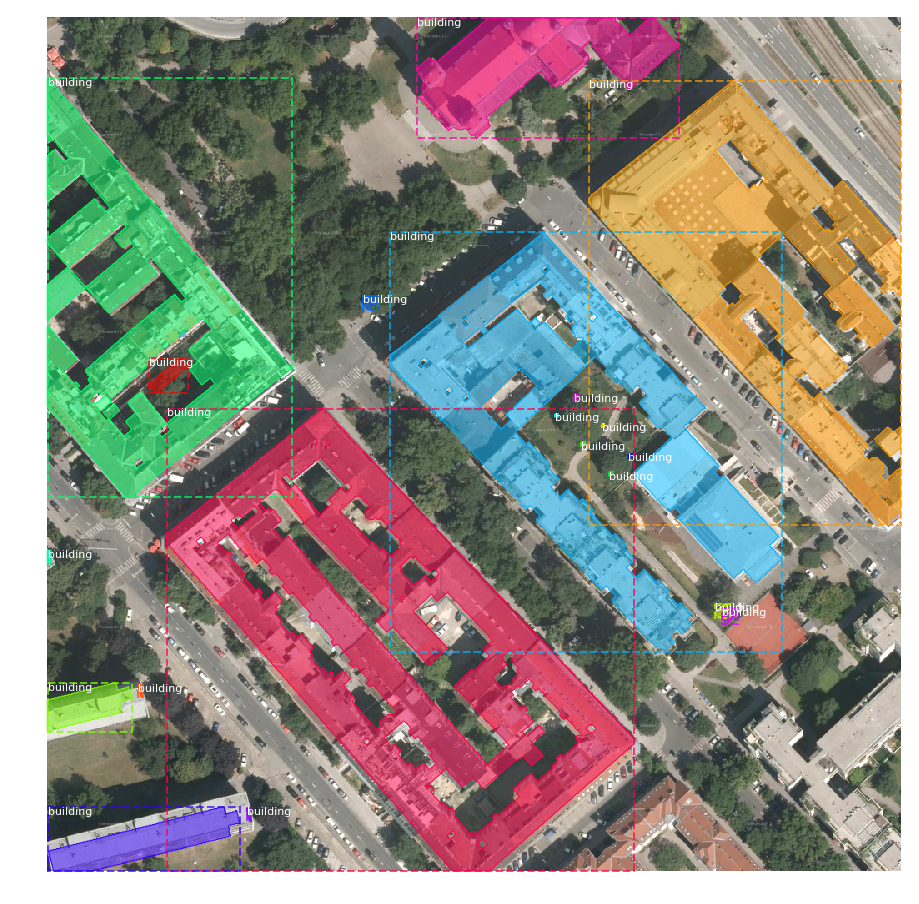

In [13]:
visualize.display_instances(image, bbox, instance_label, instance_idx, class_ids, dataset.class_names)

mask                     shape: (56, 56, 20)          min:    0.00000  max:    1.00000


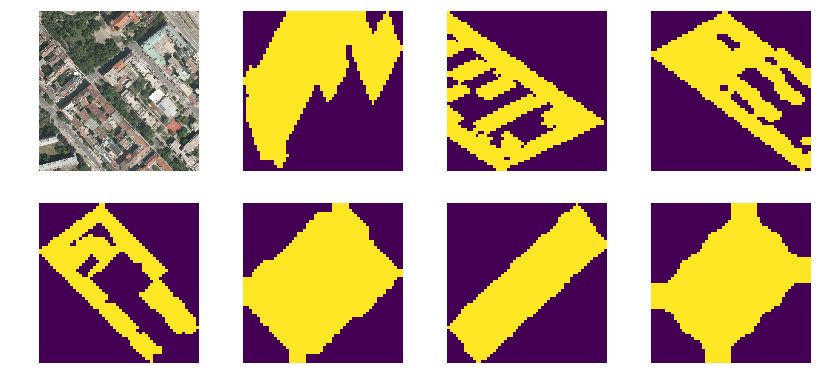

In [15]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

In [17]:
mask = utils.expand_mask(bbox, mask, image.shape)


In [20]:
mask.shape

(1024, 1024, 20)